# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)
print("*******************************************************************************************")
print("Temporarily reducging cities from cities to cities[0:4] so only get 4 cities intially")
print("before calling api.openweathermap.org since they have limits") 
print("I believe 60 calls/minute and 1M calls/month per month)")
cities = cities[0:4]
print("*******************************************************************************************")
print(cities)

['rikitea', 'miles city', 'karpogory', 'norman wells', 'alice springs', 'bluff', 'mayskiy', 'bambous virieux', 'barrow', 'busselton', 'saint-pierre', 'leningradskiy', 'half moon bay', 'bredasdorp', 'port alfred', 'tilichiki', 'tezu', 'coquimbo', 'dekar', 'sambava', 'mahebourg', 'muros', 'mar del plata', 'solton', 'vaini', 'barentsburg', 'iroquois falls', 'carnarvon', 'sao joao da barra', 'mataura', 'tutoia', 'tuy hoa', 'punta arenas', 'kapaa', 'ribeira grande', 'marcona', 'tsihombe', 'camopi', 'kahului', 'kalemie', 'dhidhdhoo', 'butaritari', 'gladstone', 'albany', 'faya', 'alpena', 'ilulissat', 'nikolskoye', 'beyneu', 'cardston', 'new norfolk', 'bonoua', 'jamestown', 'tautira', 'upernavik', 'lagoa', 'east london', 'bengkulu', 'victoria', 'grindavik', 'bethel', 'cape town', 'inhambane', 'castro', 'yellowknife', 'lebu', 'big rapids', 'champerico', 'maamba', 'horizontina', 'puerto del rosario', 'mogadishu', 'nome', 'kindu', 'esperance', 'puerto ayora', 'alofi', 'klaksvik', 'nelson bay', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#city = "London"

#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity=[]
clouds=[]
wind=[]
city_counter=0

print("cities")
print(cities)
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    
    print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
    print(f"The latitude information for city {city} #{city_counter} received is: {lon}")
    print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
    print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
    print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
    print(f"The windiness information for city {city} #{city_counter} received is: {wind}")

    city_counter+=1
    
    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

cities
['rikitea', 'miles city', 'karpogory', 'norman wells']
The latitude information for city rikitea #0 received is: [-23.1203]
The latitude information for city rikitea #0 received is: [-134.9692]
The temperature information for city rikitea #0 received is: [25.74]
The humidty information for city rikitea #0 received is: [73]
The cloudiness information for city rikitea #0 received is: [40]
The windiness information for city rikitea #0 received is: [4.76]
The latitude information for city miles city #1 received is: [-23.1203, 46.4083]
The latitude information for city miles city #1 received is: [-134.9692, -105.8406]
The temperature information for city miles city #1 received is: [25.74, 10.28]
The humidty information for city miles city #1 received is: [73, 33]
The cloudiness information for city miles city #1 received is: [40, 1]
The windiness information for city miles city #1 received is: [4.76, 10.46]
The latitude information for city karpogory #2 received is: [-23.1203, 46.408

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}
weather_data = pd.DataFrame(weather_dict)

print("*******************************************************************************************")
print("Temporarily printing out weather_data.head() just below to see table data in this cell,")
print("but can remove the line below later since basically in the next cell")
print("*******************************************************************************************")
print(weather_data.head())


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

*******************************************************************************************
Temporarily printing out weather_data.head() just below to see table data in this cell,
but can remove the line below later since basically in the next cell
*******************************************************************************************
           city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0       rikitea -23.1203 -134.9692  25.74        73          40        4.76
1    miles city  46.4083 -105.8406  10.28        33           1       10.46
2     karpogory  64.0019   44.4451  -7.71        93          92        3.96
3  norman wells  65.2820 -126.8329 -32.98        62          75        0.00


In [ ]:
# Display the DataFrame
weather_data

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [22]:
cities_high_humidity = []
city_counter=0
for city in cities:
    if int(humidity[city_counter]) > 100:
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new DataFrame 
        cities_high_humidity.append(city_counter)
        print(f"{city} with city_counter of {city_counter} has humidty >100 so need to remove later")
    else:
        print("Skip since no humidity >100")
    city_counter+=1
print("Latest cities_high_humidity")
print(cities_high_humidity)

Skip since no humidity >100
Skip since no humidity >100
Skip since no humidity >100
Skip since no humidity >100
Latest cities_high_humidity
[]


In [23]:
#  Get the indices of cities that have humidity over 100%.
print("Latest cities_high_humidity")
print(cities_high_humidity)

Latest cities_high_humidity
[]


In [27]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=weather_data.drop(cities_high_humidity, inplace=False) 
else:
    print("No high humidity data") 
print("weather_data") 
print(weather_data)
print()
print("clean_city_data") 
print(clean_city_data)
#print("dtypes()")
#print(clean_city_data.dtypes)

No high humidity data
weather_data
           city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0       rikitea -23.1203 -134.9692  25.74        73          40        4.76
1    miles city  46.4083 -105.8406  10.28        33           1       10.46
2     karpogory  64.0019   44.4451  -7.71        93          92        3.96
3  norman wells  65.2820 -126.8329 -32.98        62          75        0.00

clean_city_data
           city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0       rikitea -23.1203 -134.9692  25.74        73          40        4.76
1    miles city  46.4083 -105.8406  10.28        33           1       10.46
2     karpogory  64.0019   44.4451  -7.71        93          92        3.96
3  norman wells  65.2820 -126.8329 -32.98        62          75        0.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

************************************************************
Should I convert temp from Celsius to Fahrenheit to make it easier to understand???
using somethink like f_temp=(temp*1.8)+32
************************************************************
clean_city_data
           city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0       rikitea -23.1203 -134.9692  25.74        73          40        4.76
1    miles city  46.4083 -105.8406  10.28        33           1       10.46
2     karpogory  64.0019   44.4451  -7.71        93          92        3.96
3  norman wells  65.2820 -126.8329 -32.98        62          75        0.00


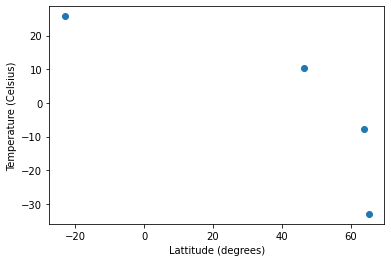

In [36]:
print("************************************************************")
print("Should I convert temp from Celsius to Fahrenheit to make it easier to understand???")
print("using somethink like f_temp=(temp*1.8)+32")
print("************************************************************")
#f_temp=(temp*1.8)+32


print("clean_city_data") 
print(clean_city_data)

# Display scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.show()

# #Save scatter plot as .png file
# # plot = dtf.plot()
# # fig = plot.get_figure()
# # fig.savefig("output.png")
# my_plt_df.savefig('output_data/lat_temp.png')

#my_plt_df=pd.DataFrame(["Lattitude (degrees)":lat)],["Temperature (Celsius)":temp])

# How do I save a pandas plot to a picture?
# The following code section constructs a line plot and saves the plot to the image file plot. png.
# x = [0, 2, 4, 6] y = [1, 3, 4, 8]
# plt. xlabel('x values') plt. ylabel('y values') plt. title('plotted x and y values') plt. legend(['line 1'])
# # save the figure plt. savefig('plot.png', dpi=300, bbox_inches='tight')



## Latitude vs. Humidity Plot

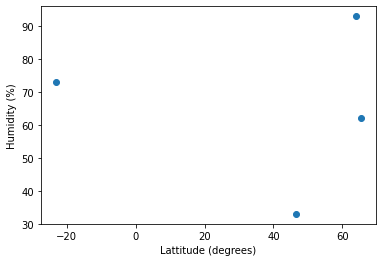

In [31]:
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

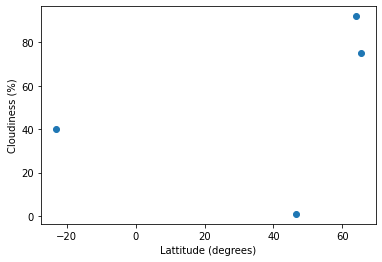

In [32]:
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

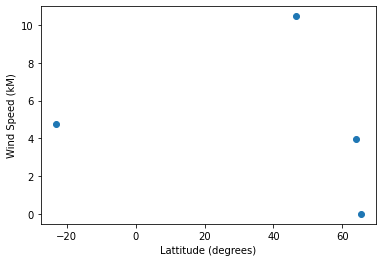

In [33]:
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression